In [1]:
# import all library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# 1. Import the Dataset (Example: Using a CSV file)

df=pd.read_csv('train.csv')
print("First few rows:\n", df.head())
print("\nDataset info:\n", df.info())
print("\nDataset description:\n", df.describe())

First few rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


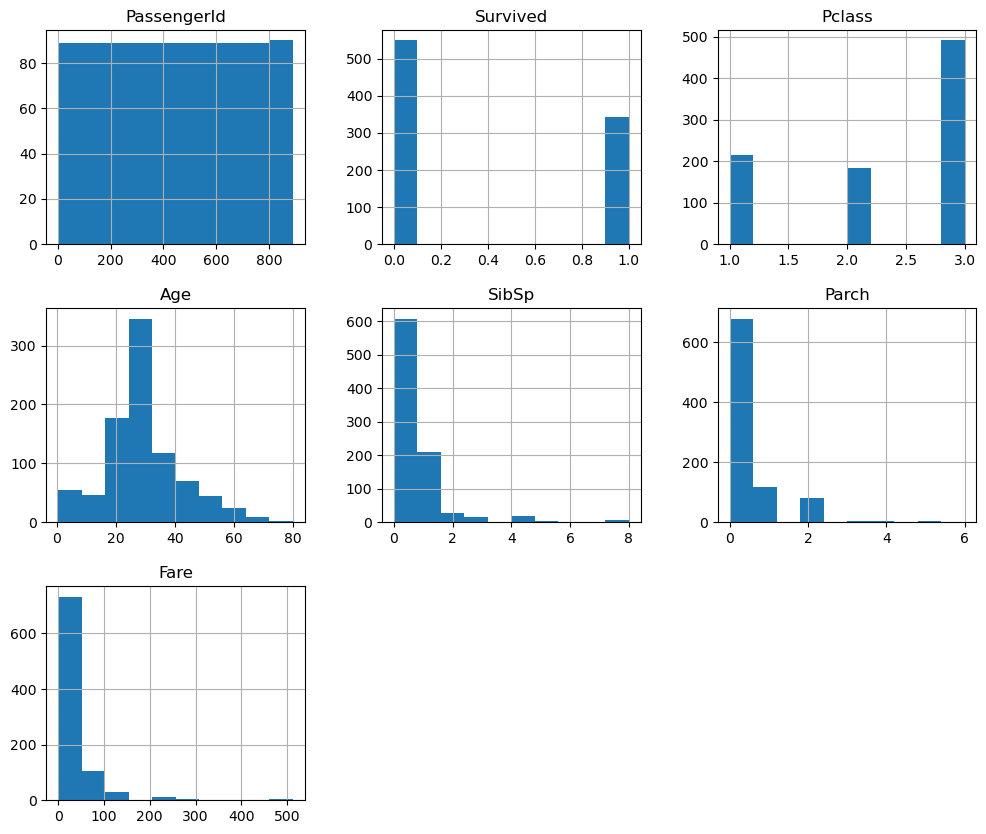

In [3]:
# 2. Data Visualization & Preprocessing
# Missing Values
print("\nMissing values:\n", df.isnull().sum())
# Example: Impute missing numerical values with the mean
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)
# Example: Impute missing categorical values with the mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# EDA (Example: Histograms and correlation heatmap)
df.hist(figsize=(12, 10))
plt.show()


# Example: Encoding categorical features
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Feature Scaling (Example: StandardScaler)
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [4]:
# 3. Feature Extraction (Example: Correlation-based selection)
correlation_matrix = df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)] #threshold of 0.8
df.drop(to_drop, axis=1, inplace=True)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# 4. Train-Test Data Split
X = df.drop("Embarked", axis=1)  # Replace "target_column"
y = df["Embarked"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# 5. Model Selection (Example: Random Forest)
model = RandomForestClassifier(random_state=42)



In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Apply Label Encoding to target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# If you have a test set, apply the same transformation
y_test_encoded = label_encoder.transform(y_test)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best model
best_model = grid_search.best_estimator_

In [9]:
# 7. Model Evaluation
y_test_encoded = label_encoder.transform(y_test)

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluation Metrics
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("\nAccuracy:", accuracy_score(y_test_encoded, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78        43
           1       1.00      0.71      0.83        17
           2       0.86      0.98      0.92       119

    accuracy                           0.88       179
   macro avg       0.93      0.79      0.84       179
weighted avg       0.89      0.88      0.88       179


Confusion Matrix:
 [[ 29   0  14]
 [  0  12   5]
 [  2   0 117]]

Accuracy: 0.88268156424581


In [10]:
# 8. Conclusion
# Interpretation, improvements, comparison (if applicable)
print("\nBest parameters from GridSearchCV:", grid_search.best_params_)
# ... Add your conclusions and interpretations here ...


Best parameters from GridSearchCV: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Model Performance Interpretation
Classification Report

Look at Precision, Recall, and F1-score for each class.

If there's a class imbalance, F1-score is more meaningful than accuracy.

Low recall → Model is missing too many positive cases (high false negatives).

Low precision → Too many false positives.

Confusion Matrix

Identifies misclassified instances and which classes the model struggles with.

Helps determine whether errors are balanced or skewed toward certain classes.

Accuracy Score

If accuracy is very high, check if it's due to data imbalance.

If accuracy is low, check feature engineering or consider different models.

Suggested Improvements & Enhancements
Feature Engineering

Try scaling numeric features (StandardScaler, MinMaxScaler).

Create new features from existing ones (feature interactions, polynomial features).

Remove irrelevant or redundant features using feature selection.

Hyperparameter Tuning

Try RandomizedSearchCV (faster than GridSearchCV).

Experiment with different scoring metrics (e.g., F1-score instead of accuracy).

Handling Class Imbalance

If imbalance exists, use SMOTE (Synthetic Minority Oversampling Technique).

Adjust class weights in the model (class_weight='balanced' for tree-based models).

Try Different Models

Decision Trees / Random Forests (if interpretability is needed).

SVM (if dataset is small & well-separated).

Neural Networks (for complex relationships).

XGBoost / LightGBM (if performance is a priority).

Compare log-loss, ROC-AUC, precision-recall curves for model selection.

